# Telegram Activity Example

In [2]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [3]:

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from quantnote_query_api.query_api_client import QuantNoteQueryApi


## Create api client

In [4]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

# Get telegram activity

In [5]:
query = """SELECT date_trunc('hour', created_at) as time, count(id) as count
FROM pubs.telegram.messages
where created_at >= timestamp '2023-01-20'
  and created_at <= timestamp '2023-01-31'
  and contains(tags, 'eth')
group by 1
order by 1;"""

response = client.get_data_response(query)
response['time'] = pd.to_datetime(response['time'])
response.set_index('time')
response

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,count,time
0,50,2023-01-20 00:00:00+00:00
1,44,2023-01-20 01:00:00+00:00
2,49,2023-01-20 02:00:00+00:00
3,38,2023-01-20 03:00:00+00:00
4,39,2023-01-20 04:00:00+00:00
...,...,...
259,165,2023-01-30 19:00:00+00:00
260,142,2023-01-30 20:00:00+00:00
261,127,2023-01-30 21:00:00+00:00
262,129,2023-01-30 22:00:00+00:00


# Plot telegram activity

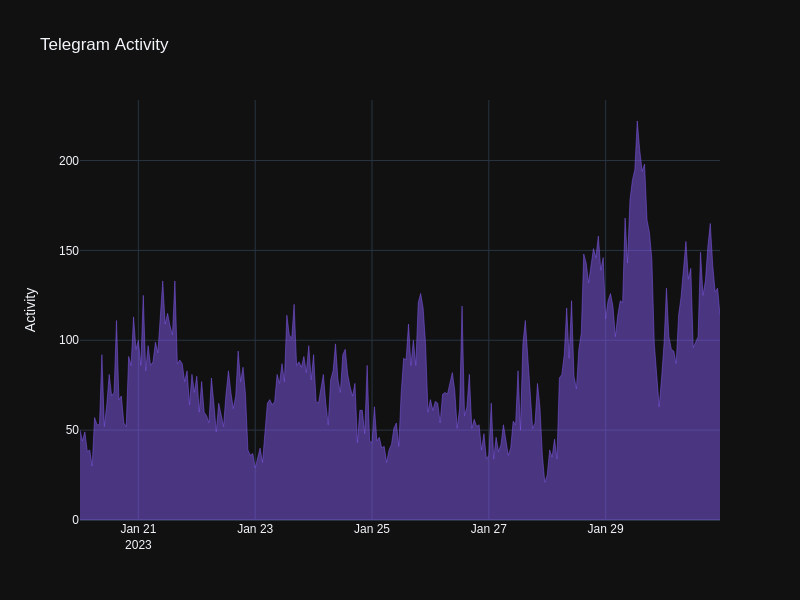

In [6]:
fig = go.Figure()

tg_activity = go.Scatter(x=response['time'],
                         y=response['count'],
                         name="tg activity",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy'
                         )

fig.add_trace(tg_activity)

fig.update_layout(
    width=800, height=600,
    title="Telegram Activity",
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Activity")

fig.show("png")


# Get TOHLCV

In [7]:
tohlcv_query = """SELECT time, p.symbol, open, high, low, close, volume, trades
FROM cex.binance.candles_hourly join cex.binance.pairs p on p.id = candles_hourly.pair_id
WHERE time > timestamp '2023-01-20'
  and time < timestamp '2023-01-31'
  and p.symbol = 'ETHUSDT'
ORDER BY time;"""

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close,high,low,open,symbol,time,trades,volume
0,1556.180000000000000000,1558.210000000000000000,1545.510000000000000000,1548.220000000000000000,ETHUSDT,2023-01-20 01:00:00+00:00,14595.000000000000000000,8390.040600000000000000
1,1553.660000000000000000,1563.880000000000000000,1553.610000000000000000,1556.180000000000000000,ETHUSDT,2023-01-20 02:00:00+00:00,18874.000000000000000000,12407.656500000000000000
2,1554.540000000000000000,1556.120000000000000000,1551.290000000000000000,1553.660000000000000000,ETHUSDT,2023-01-20 03:00:00+00:00,14113.000000000000000000,4589.131300000000000000
3,1546.920000000000000000,1556.660000000000000000,1545.980000000000000000,1554.550000000000000000,ETHUSDT,2023-01-20 04:00:00+00:00,14014.000000000000000000,9126.302600000000000000
4,1547.120000000000000000,1551.000000000000000000,1542.740000000000000000,1546.910000000000000000,ETHUSDT,2023-01-20 05:00:00+00:00,17279.000000000000000000,10561.479200000000000000
...,...,...,...,...,...,...,...,...
255,1547.180000000000000000,1578.390000000000000000,1535.000000000000000000,1578.200000000000000000,ETHUSDT,2023-01-30 19:00:00+00:00,50984.000000000000000000,45938.554800000000000000
256,1553.160000000000000000,1554.620000000000000000,1547.330000000000000000,1552.490000000000000000,ETHUSDT,2023-01-30 20:00:00+00:00,12261.000000000000000000,8264.598100000000000000
257,1556.640000000000000000,1559.190000000000000000,1552.560000000000000000,1553.160000000000000000,ETHUSDT,2023-01-30 21:00:00+00:00,11519.000000000000000000,6032.886000000000000000
258,1563.960000000000000000,1567.000000000000000000,1545.010000000000000000,1556.640000000000000000,ETHUSDT,2023-01-30 22:00:00+00:00,27470.000000000000000000,17015.521600000000000000


# Plot TOHCLV with Telegram Activity

In [8]:
tohlcv_resp['open'] = pd.to_numeric(tohlcv_resp['open'])
tohlcv_resp['high'] = pd.to_numeric(tohlcv_resp['high'])
tohlcv_resp['low'] = pd.to_numeric(tohlcv_resp['low'])
tohlcv_resp['close'] = pd.to_numeric(tohlcv_resp['close'])
tohlcv_resp

,close,high,low,open,symbol,time,trades,volume
0,1556.18,1558.21,1545.51,1548.22,ETHUSDT,2023-01-20 01:00:00+00:00,14595.000000000000000000,8390.040600000000000000
1,1553.66,1563.88,1553.61,1556.18,ETHUSDT,2023-01-20 02:00:00+00:00,18874.000000000000000000,12407.656500000000000000
2,1554.54,1556.12,1551.29,1553.66,ETHUSDT,2023-01-20 03:00:00+00:00,14113.000000000000000000,4589.131300000000000000
3,1546.92,1556.66,1545.98,1554.55,ETHUSDT,2023-01-20 04:00:00+00:00,14014.000000000000000000,9126.302600000000000000
4,1547.12,1551.00,1542.74,1546.91,ETHUSDT,2023-01-20 05:00:00+00:00,17279.000000000000000000,10561.479200000000000000
...,...,...,...,...,...,...,...,...
255,1547.18,1578.39,1535.00,1578.20,ETHUSDT,2023-01-30 19:00:00+00:00,50984.000000000000000000,45938.554800000000000000
256,1553.16,1554.62,1547.33,1552.49,ETHUSDT,2023-01-30 20:00:00+00:00,12261.000000000000000000,8264.598100000000000000
257,1556.64,1559.19,1552.56,1553.16,ETHUSDT,2023-01-30 21:00:00+00:00,11519.000000000000000000,6032.886000000000000000
258,1563.96,1567.00,1545.01,1556.64,ETHUSDT,2023-01-30 22:00:00+00:00,27470.000000000000000000,17015.521600000000000000


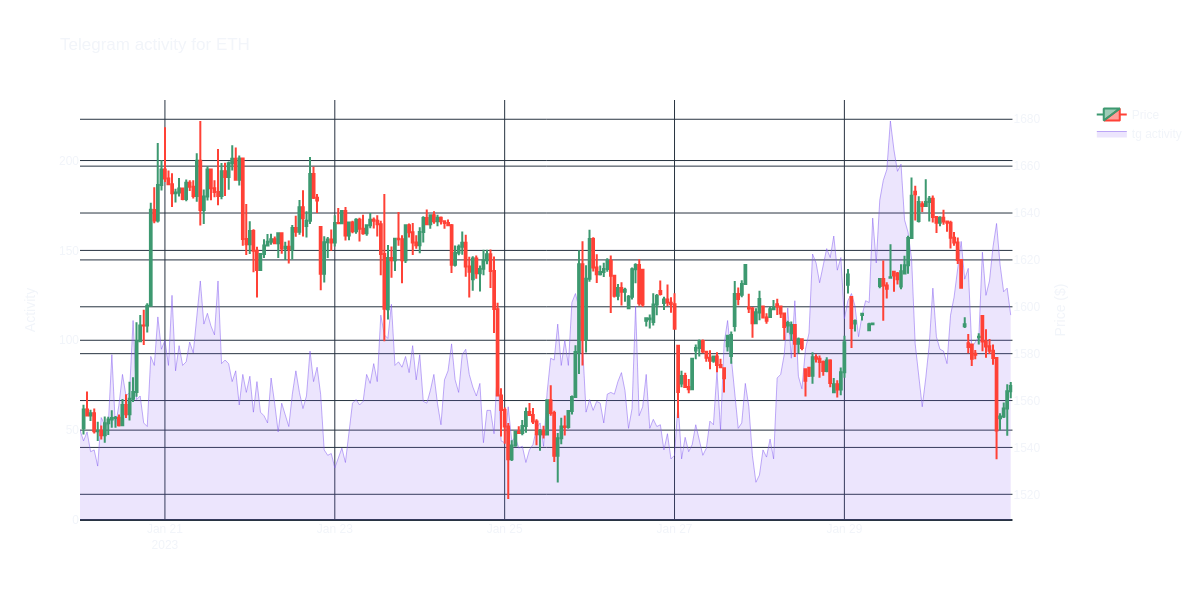

In [9]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open'],
    high=tohlcv_resp['high'],
    low=tohlcv_resp['low'],
    close=tohlcv_resp['close'],
    name="Price"
)

tg_activity = go.Scatter(x=response['time'],
                         y=response['count'],
                         name="tg activity",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )

fig.add_trace(candlestick, secondary_y=True)
fig.add_trace(tg_activity, secondary_y=False)

fig.update_layout(
    width=1200, height=600,
    title="Telegram activity for ETH",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Activity", secondary_y=False)
fig.update_yaxes(title_text="Price ($)", secondary_y=True)

fig.show("png")

### Get Telegram sentiment

Obtain data from API

In [10]:
sent_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion) as sentiment
FROM pubs.telegram.messages
where created_at >= timestamp '2023-01-20'
  and created_at <= timestamp '2023-01-31'
  and contains(tags, 'eth')
group by 1
order by 1;"""

sent = client.get_data_response(sent_query)

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

Some calculations and editing data
Calculate EMA

In [11]:
sent['time'] = pd.to_datetime(sent['time'])
sent.set_index('time')
sent['sentiment'] = pd.to_numeric(sent['sentiment'])
sent['ewm'] = sent['sentiment'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
sent

,sentiment,time,ewm
0,0.423476,2023-01-20 00:00:00+00:00,0.423476
1,0.363566,2023-01-20 01:00:00+00:00,0.417770
2,0.465602,2023-01-20 02:00:00+00:00,0.422326
3,0.389471,2023-01-20 03:00:00+00:00,0.419197
4,0.343779,2023-01-20 04:00:00+00:00,0.412014
...,...,...,...
259,0.456495,2023-01-30 19:00:00+00:00,0.545904
260,0.490652,2023-01-30 20:00:00+00:00,0.540642
261,0.507701,2023-01-30 21:00:00+00:00,0.537505
262,0.496974,2023-01-30 22:00:00+00:00,0.533645


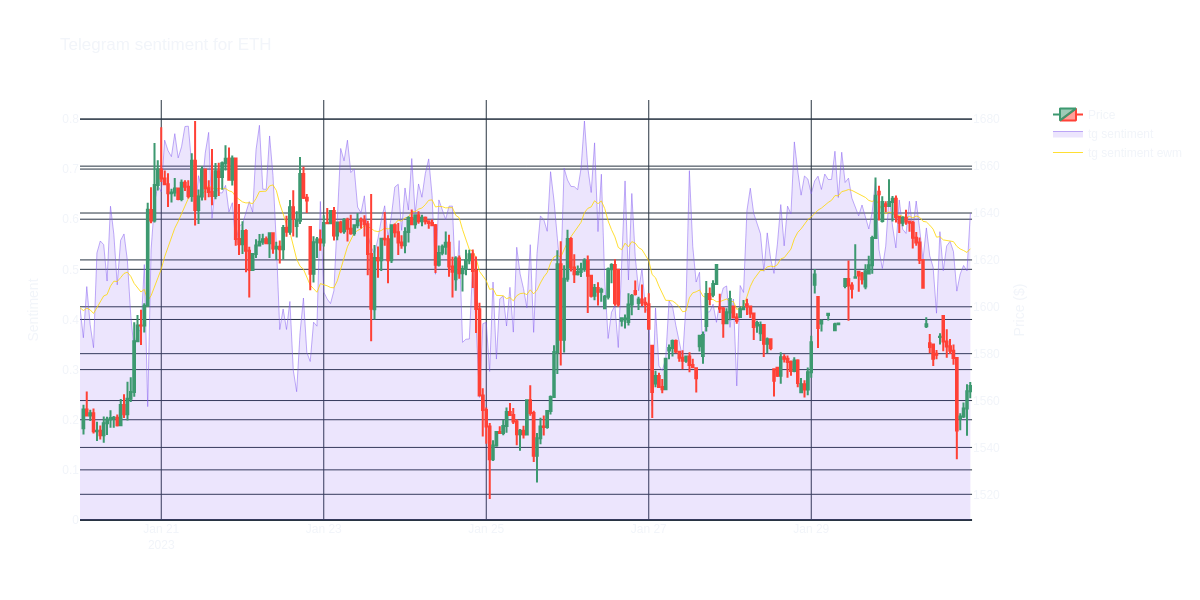

In [13]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open'],
    high=tohlcv_resp['high'],
    low=tohlcv_resp['low'],
    close=tohlcv_resp['close'],
    name="Price"
)

tg_sentiment = go.Scatter(x=sent['time'],
                         y=sent['sentiment'],
                         name="tg sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent['time'],
                         y=sent['ewm'],
                         name="tg sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(candlestick, secondary_y=True)
fig.add_trace(tg_sentiment, secondary_y=False)
fig.add_trace(tg_sentiment_ewm, secondary_y=False)

fig.update_layout(
    width=1200, height=600,
    title="Telegram sentiment for ETH",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment", secondary_y=False)
fig.update_yaxes(title_text="Price ($)", secondary_y=True)

fig.show("png")